In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 6.8 MB/s eta 0:00:00


In [2]:
# Chargement des données
data = '../data/valeursfoncieres-2022.txt'

# Lecture du fichier par échantillons de 10 000 lignes
df = pd.read_csv(data, sep='|', decimal=',')

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_69776/3051861453.py:5: DtypeWarning: Columns (18,23,24,26,28,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data, sep='|', decimal=',')


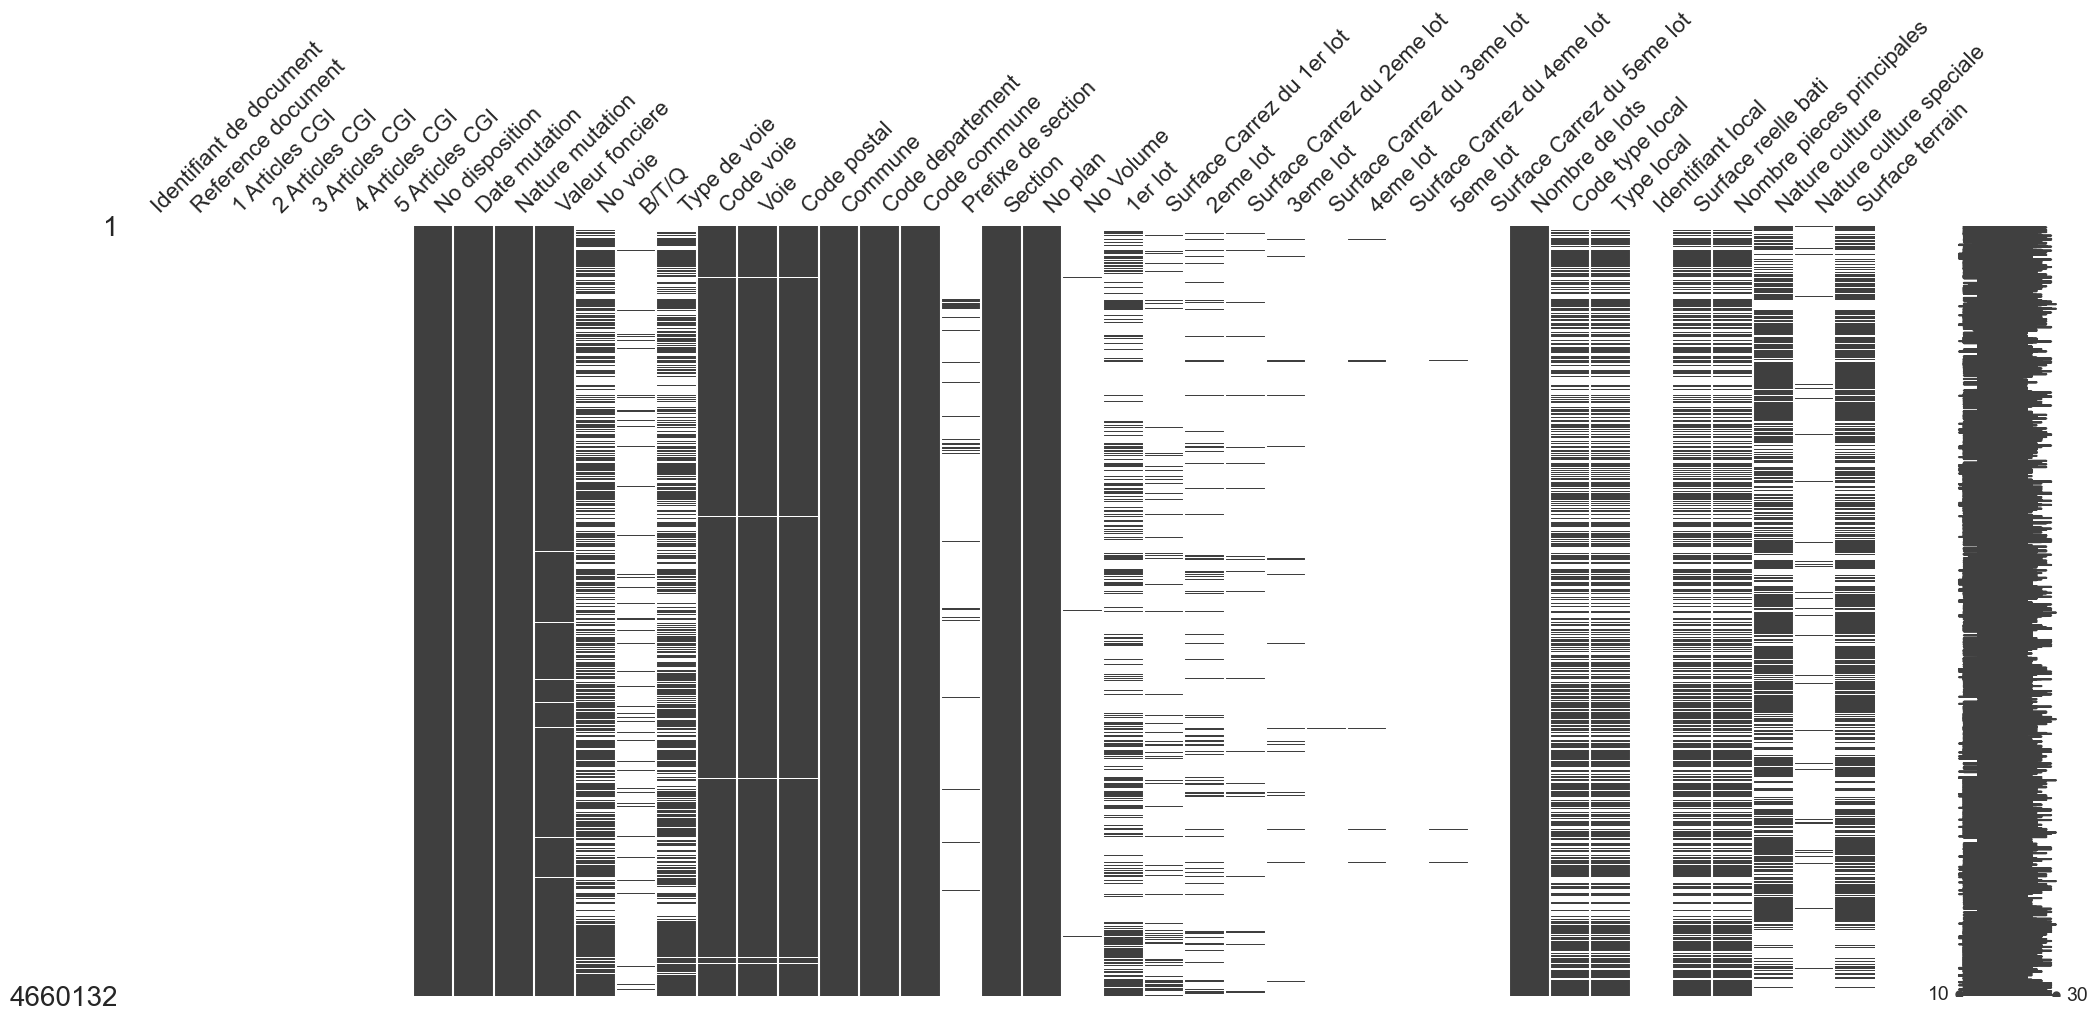

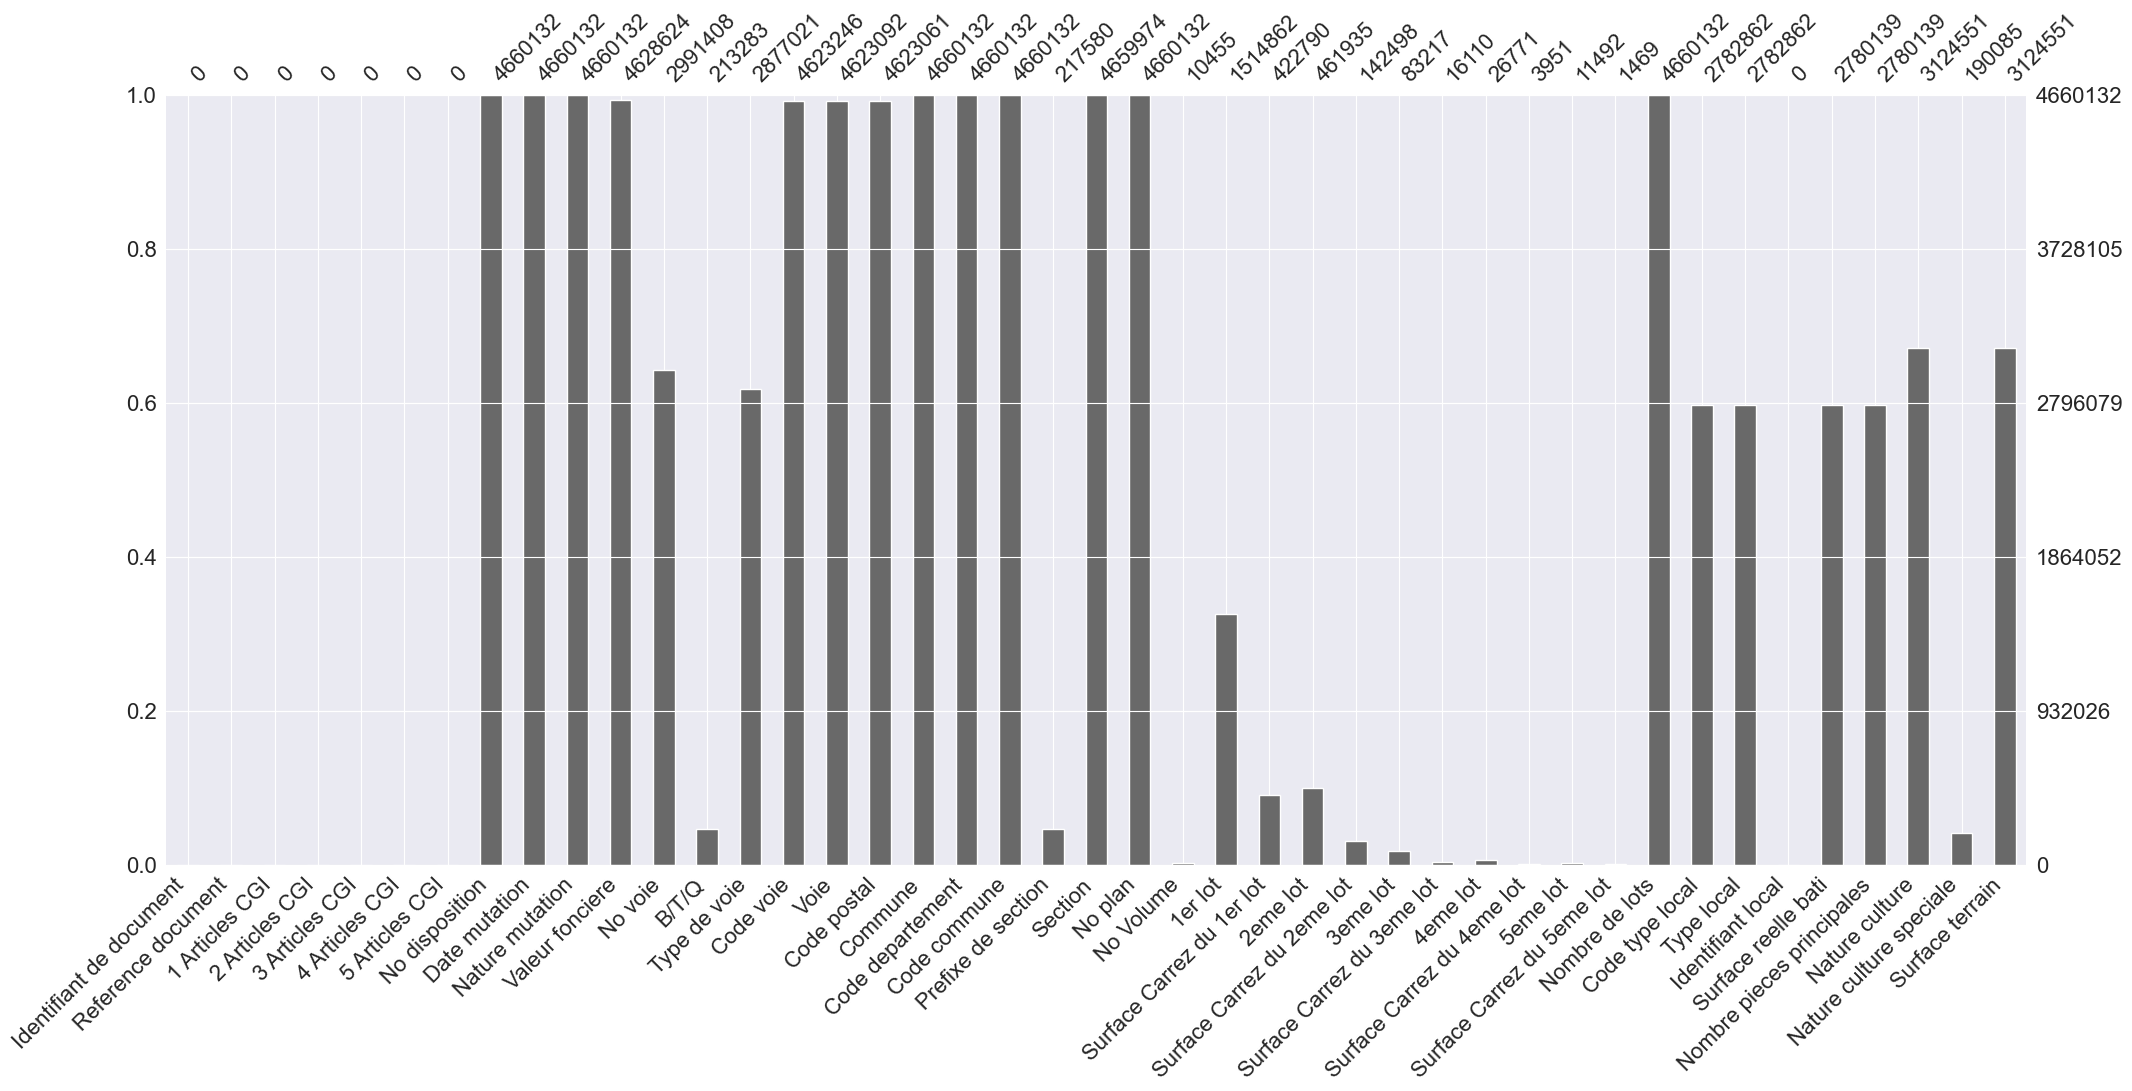

In [3]:
import missingno as msno

# Visualize missing data as a matrix
msno.matrix(df)
plt.show()

# Bar plot of missing data
msno.bar(df)
plt.show()


In [4]:
# On garde les colonnes qui nous intéressent :
df = df[["No disposition", "Date mutation", "Nature mutation", "Valeur fonciere", "Code departement", "Code commune", "Prefixe de section", "Section", "No plan",'No Volume', "Code type local", "Surface reelle bati", "Surface terrain", "Nombre pieces principales","Nature culture"]]

# Afficher les 10 premières lignes
df.head(10)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,Code type local,Surface reelle bati,Surface terrain,Nombre pieces principales,Nature culture
0,1,03/01/2022,Vente,55000.0,1,53,NaN,AM,102,NaN,2.0,24.0,NaN,1.0,NaN
1,1,03/01/2022,Vente,143000.0,1,398,NaN,ZE,184,NaN,NaN,NaN,84.0,NaN,S
2,1,03/01/2022,Vente,143000.0,1,398,NaN,ZE,185,NaN,NaN,NaN,88.0,NaN,S
3,1,03/01/2022,Vente,143000.0,1,398,NaN,ZE,187,NaN,2.0,140.0,NaN,3.0,NaN
4,1,04/01/2022,Vente,300.0,1,243,NaN,A,643,NaN,NaN,NaN,510.0,NaN,T
5,1,06/01/2022,Vente,255000.0,1,230,NaN,ZM,124,NaN,1.0,108.0,649.0,5.0,S
6,1,06/01/2022,Vente,255000.0,1,230,NaN,ZM,126,NaN,NaN,NaN,360.0,NaN,S
7,1,03/01/2022,Vente,525000.0,1,333,NaN,AN,23,NaN,NaN,NaN,50.0,NaN,S
8,1,03/01/2022,Vente,525000.0,1,333,NaN,AN,186,NaN,4.0,424.0,628.0,0.0,S
9,1,03/01/2022,Vente,525000.0,1,333,NaN,AN,186,NaN,2.0,126.0,628.0,4.0,S


In [5]:
df.describe()

,No disposition,Valeur fonciere,Code commune,Prefixe de section,No plan,Code type local,Surface reelle bati,Surface terrain,Nombre pieces principales
count,4.660132e+06,4.628624e+06,4.660132e+06,217580.000000,4.660132e+06,2.782862e+06,2.780139e+06,3.124551e+06,2.780139e+06
mean,1.378111e+00,2.804530e+06,2.061571e+02,462.850165,4.151017e+02,2.270794e+00,6.487456e+01,2.796231e+03,1.754998e+00
std,1.512457e+01,2.679600e+07,1.653364e+02,320.372933,5.884820e+02,9.214719e-01,5.626586e+02,1.562872e+04,2.070245e+00
min,1.000000e+00,1.000000e-02,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,7.600000e+04,7.500000e+01,172.000000,8.600000e+01,1.000000e+00,0.000000e+00,2.450000e+02,0.000000e+00
50%,1.000000e+00,1.750000e+05,1.710000e+02,355.000000,2.230000e+02,2.000000e+00,3.000000e+01,6.090000e+02,1.000000e+00
75%,1.000000e+00,3.200000e+05,2.920000e+02,828.000000,5.060000e+02,3.000000e+00,8.000000e+01,1.674000e+03,3.000000e+00
max,1.246000e+03,1.003401e+09,9.090000e+02,950.000000,9.971000e+03,4.000000e+00,2.900000e+05,4.625500e+06,9.000000e+01


In [6]:
# Conversion des autres colonnes en types numériques, avec gestion des NaN
cols_to_convert = ['Surface reelle bati', 'Surface terrain']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remplacer les NaN par 0
df.fillna(0, inplace=True)

In [7]:
df.shape

(4660132, 15)

In [8]:
df.drop_duplicates()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,Code type local,Surface reelle bati,Surface terrain,Nombre pieces principales,Nature culture
0,1,03/01/2022,Vente,55000.0,1,53,0.0,AM,102,0,2.0,24.0,0.0,1.0,0
1,1,03/01/2022,Vente,143000.0,1,398,0.0,ZE,184,0,0.0,0.0,84.0,0.0,S
2,1,03/01/2022,Vente,143000.0,1,398,0.0,ZE,185,0,0.0,0.0,88.0,0.0,S
3,1,03/01/2022,Vente,143000.0,1,398,0.0,ZE,187,0,2.0,140.0,0.0,3.0,0
4,1,04/01/2022,Vente,300.0,1,243,0.0,A,643,0,0.0,0.0,510.0,0.0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660126,1,15/02/2022,Vente,505000.0,75,107,0.0,BZ,63,0,3.0,0.0,0.0,0.0,0
4660127,1,15/02/2022,Vente,505000.0,75,107,0.0,BZ,63,0,2.0,33.0,0.0,1.0,0
4660128,1,17/05/2022,Vente,2100000.0,75,116,0.0,CH,54,0,3.0,0.0,0.0,0.0,0
4660129,1,17/05/2022,Vente,2100000.0,75,116,0.0,CH,54,0,4.0,138.0,0.0,0.0,0


In [9]:
# Fusionner les lignes similaires
df = df.groupby(['Date mutation','Nature mutation', 'Valeur fonciere', 'Code departement', 'Code commune', 'Prefixe de section', 'Section', 'No plan', 'Surface terrain',"Nature culture"]).agg({
    'Nombre pieces principales': 'sum',
    'Code type local': 'min',
    'Surface reelle bati': 'sum',
}).reset_index()

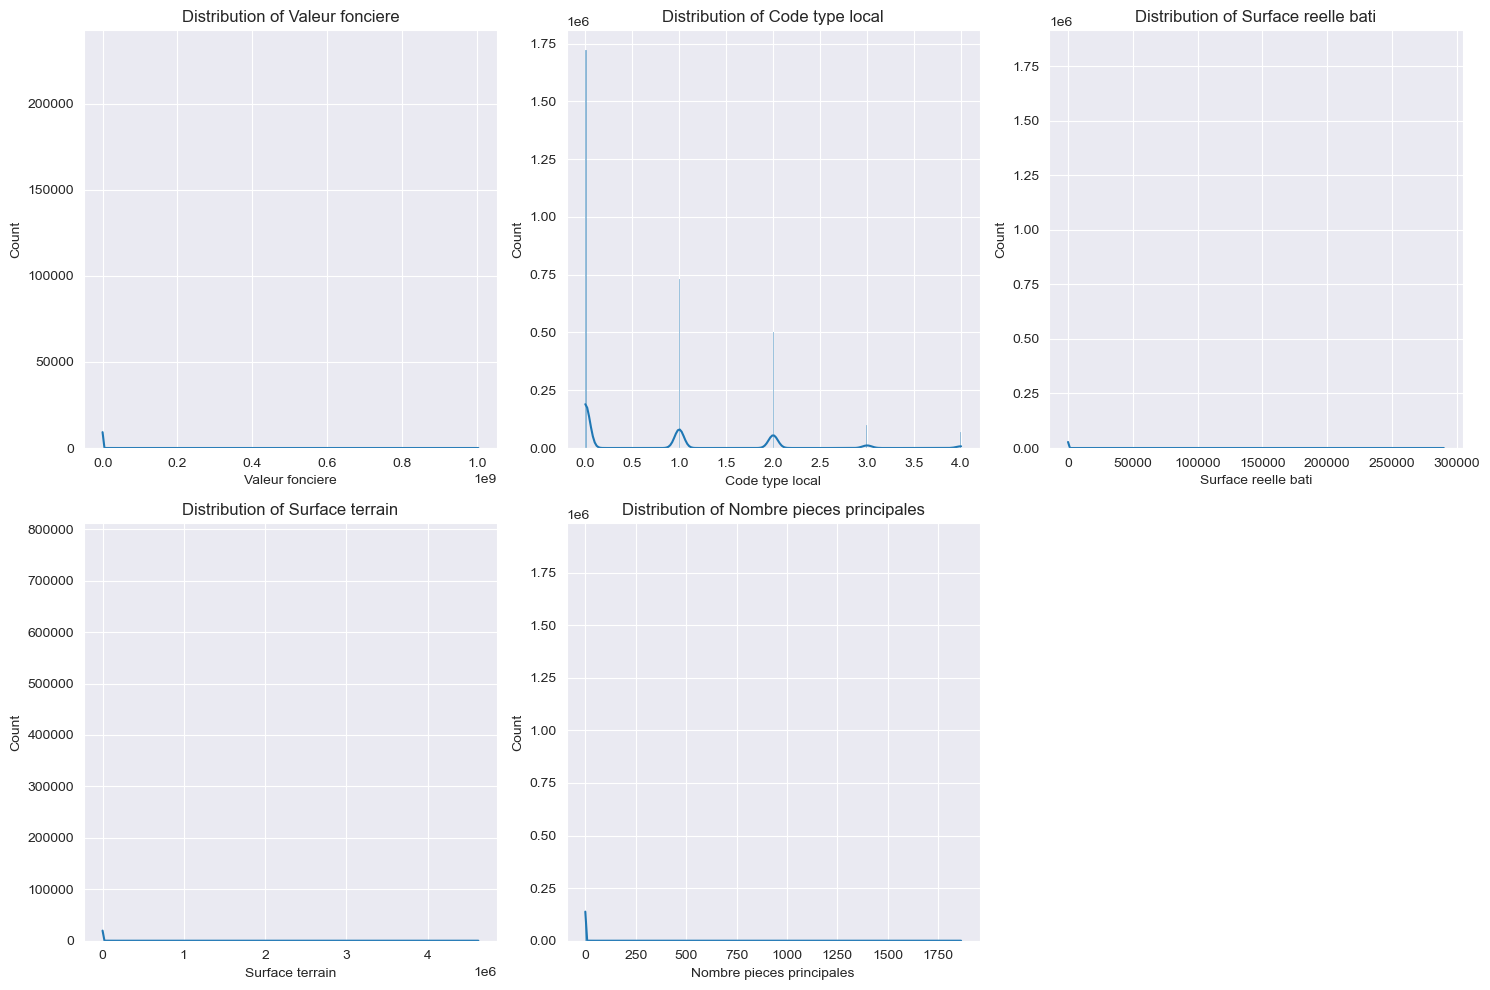

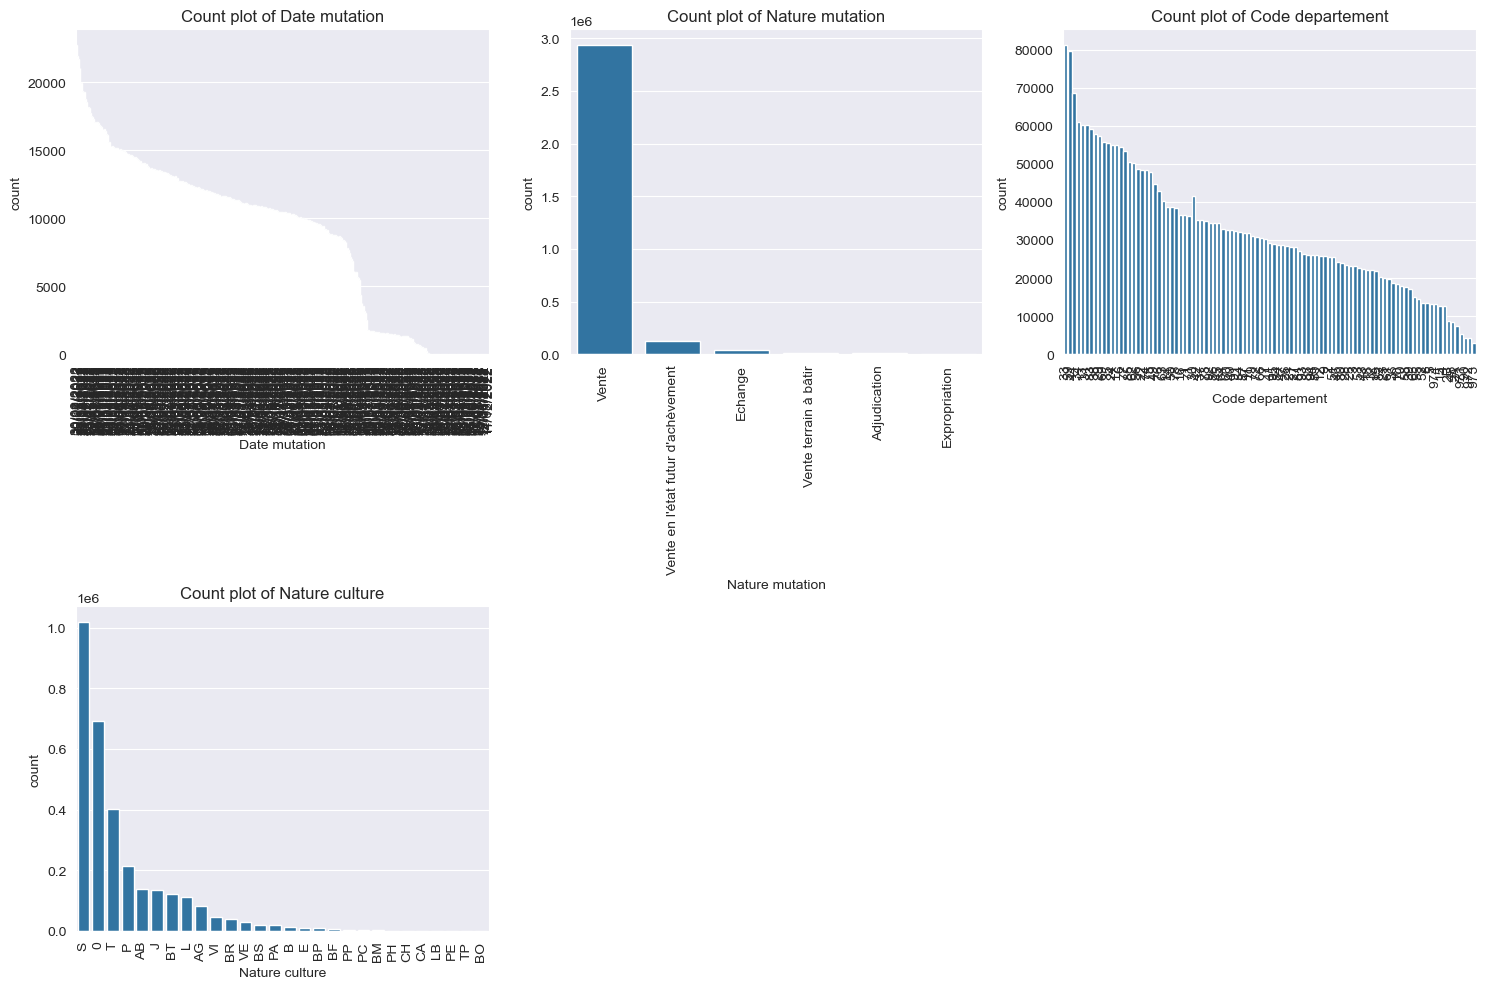

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only the desired columns for plotting
columns_to_plot = ["Date mutation", "Nature mutation", "Valeur fonciere", 
                   "Code departement", "Code type local", 
                   "Surface reelle bati", "Surface terrain", 
                   "Nombre pieces principales", "Nature culture"]

# Subset the dataframe
df_subset = df[columns_to_plot]

# Separate numerical and categorical columns
numerical_cols = df_subset.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_subset.select_dtypes(include=['object']).columns

# Plot the distribution for numerical columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_subset[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

# Plot the count plot for categorical columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df_subset, x=col, order=df_subset[col].value_counts().index)
    plt.xticks(rotation=90)  # Rotate x-labels if necessary
    plt.title(f'Count plot of {col}')
    plt.tight_layout()

plt.show()


In [11]:
df.shape

(3123420, 13)

In [12]:
# Apply the IQR method on df_built to remove outliers for built properties
Q1 = df["Surface terrain"].quantile(0.25)
Q3 = df["Surface terrain"].quantile(0.75)
IQR = Q3 - Q1

# Use 3x IQR for more lenient filtering
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Filter out outliers in the built dataset
df = df[(df["Surface terrain"] >= lower_bound) & (df["Surface terrain"] <= upper_bound)]

In [13]:
# Separate into two DataFrames
df_built = df[df["Surface reelle bati"] > 0]  # Properties with built area
df_land = df[df["Surface reelle bati"] == 0]  # Land-only properties


In [14]:
# Apply the IQR method on df_built to remove outliers for built properties
Q1 = df_built["Surface reelle bati"].quantile(0.25)
Q3 = df_built["Surface reelle bati"].quantile(0.75)
IQR = Q3 - Q1

# Use 3x IQR for more lenient filtering
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Filter out outliers in the built dataset
df_built = df_built[(df_built["Surface reelle bati"] >= lower_bound) & (df_built["Surface reelle bati"] <= upper_bound)]

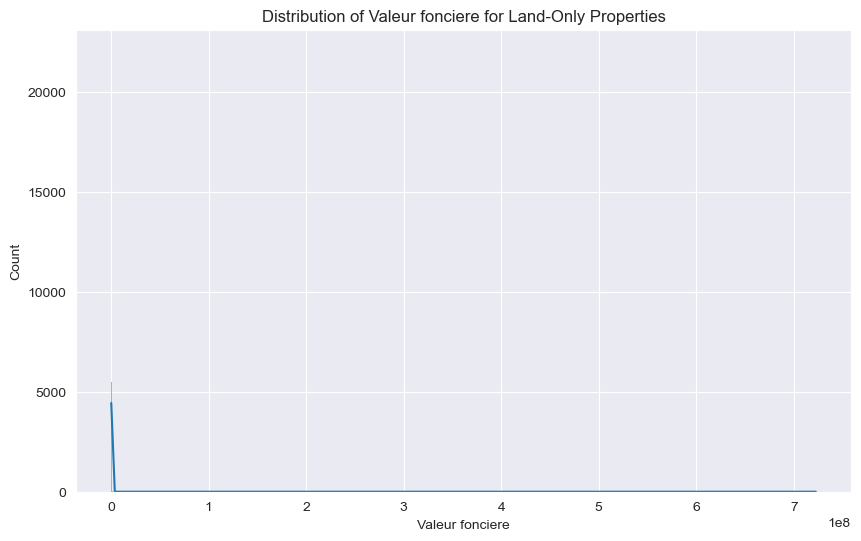

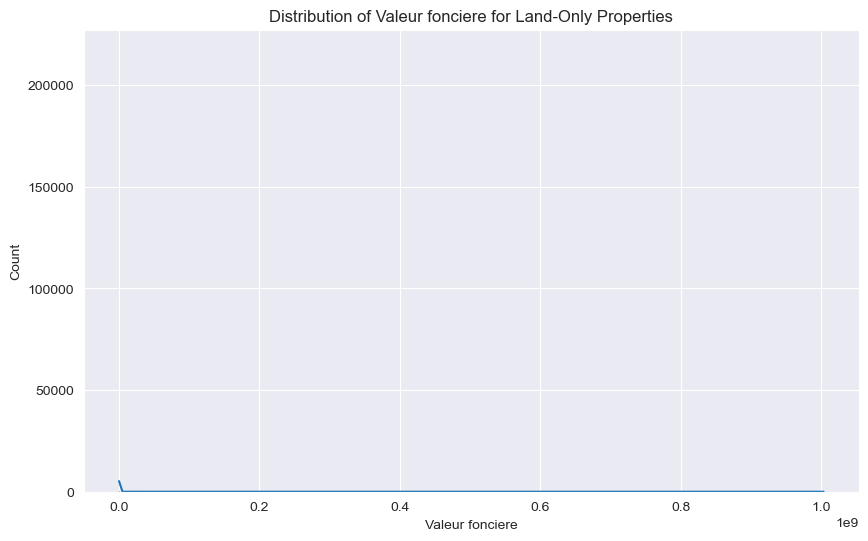

In [15]:
# Visualize land-only properties' value (df_land)
plt.figure(figsize=(10, 6))
sns.histplot(df_built["Valeur fonciere"], kde=True)
plt.title('Distribution of Valeur fonciere for Land-Only Properties')
plt.show()

# Visualize land-only properties' value (df_land)
plt.figure(figsize=(10, 6))
sns.histplot(df_land["Valeur fonciere"], kde=True)
plt.title('Distribution of Valeur fonciere for Land-Only Properties')
plt.show()


In [16]:
Q1 = df_built["Valeur fonciere"].quantile(0.25)
Q3 = df_built["Valeur fonciere"].quantile(0.75)
IQR = Q3 - Q1

# Use 3 times the IQR for more aggressive outlier removal
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Remove rows with values outside this range
df_built = df_built[(df_built["Valeur fonciere"] >= lower_bound) & (df_built["Valeur fonciere"] <= upper_bound)]

Q1 = df_land["Valeur fonciere"].quantile(0.25)
Q3 = df_land["Valeur fonciere"].quantile(0.75)
IQR = Q3 - Q1

# Use 3 times the IQR for more aggressive outlier removal
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Remove rows with values outside this range
df_land = df_land[(df_land["Valeur fonciere"] >= lower_bound) & (df_land["Valeur fonciere"] <= upper_bound)]



In [17]:
df_land.describe()

,Valeur fonciere,Code commune,Prefixe de section,No plan,Surface terrain,Nombre pieces principales,Code type local,Surface reelle bati
count,1.474293e+06,1.474293e+06,1.474293e+06,1.474293e+06,1.474293e+06,1474293.0,1.474293e+06,1474293.0
mean,1.401777e+05,2.105373e+02,1.505614e+01,5.249543e+02,8.719475e+02,0.0,2.018391e-01,0.0
std,1.637886e+05,1.606940e+02,8.775183e+01,6.474412e+02,1.124749e+03,0.0,7.566510e-01,0.0
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
25%,1.400000e+04,8.300000e+01,0.000000e+00,1.250000e+02,6.500000e+01,0.0,0.000000e+00,0.0
50%,8.000000e+04,1.810000e+02,0.000000e+00,3.140000e+02,4.000000e+02,0.0,0.000000e+00,0.0
75%,2.110000e+05,2.960000e+02,0.000000e+00,6.790000e+02,1.210000e+03,0.0,0.000000e+00,0.0
max,8.806300e+05,9.090000e+02,9.500000e+02,9.971000e+03,4.826000e+03,0.0,4.000000e+00,0.0


In [18]:
df_land.shape

(1474293, 13)

In [19]:
df_built.describe()

,Valeur fonciere,Code commune,Prefixe de section,No plan,Surface terrain,Nombre pieces principales,Code type local,Surface reelle bati
count,1.210600e+06,1.210600e+06,1.210600e+06,1.210600e+06,1.210600e+06,1.210600e+06,1.210600e+06,1.210600e+06
mean,2.268094e+05,2.086003e+02,2.465713e+01,3.786535e+02,3.687498e+02,3.556089e+00,1.494330e+00,8.719033e+01
std,1.572241e+05,1.706437e+02,1.320007e+02,5.500864e+02,5.647983e+02,1.772221e+00,6.660326e-01,4.586274e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.170000e+05,7.300000e+01,0.000000e+00,8.200000e+01,0.000000e+00,2.000000e+00,1.000000e+00,5.600000e+01
50%,1.880000e+05,1.700000e+02,0.000000e+00,2.030000e+02,1.370000e+02,4.000000e+00,1.000000e+00,8.000000e+01
75%,2.950000e+05,3.000000e+02,0.000000e+00,4.500000e+02,5.370000e+02,5.000000e+00,2.000000e+00,1.090000e+02
max,8.775000e+05,9.090000e+02,9.500000e+02,9.901000e+03,4.826000e+03,9.000000e+01,4.000000e+00,2.900000e+02


In [20]:
df_built.shape

(1210600, 13)

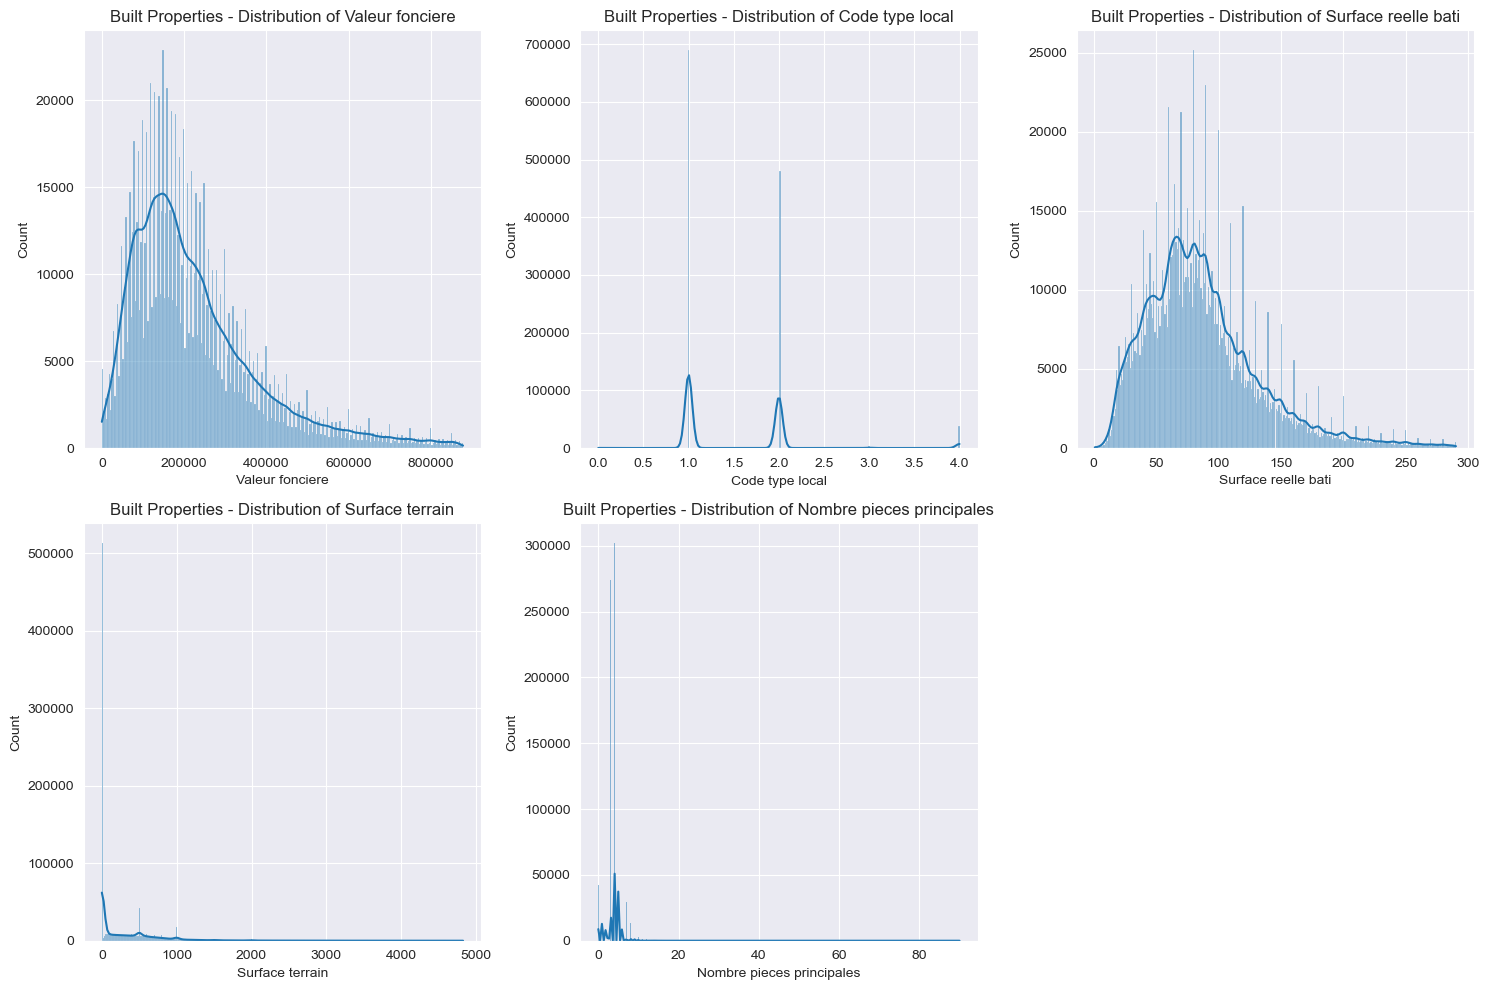

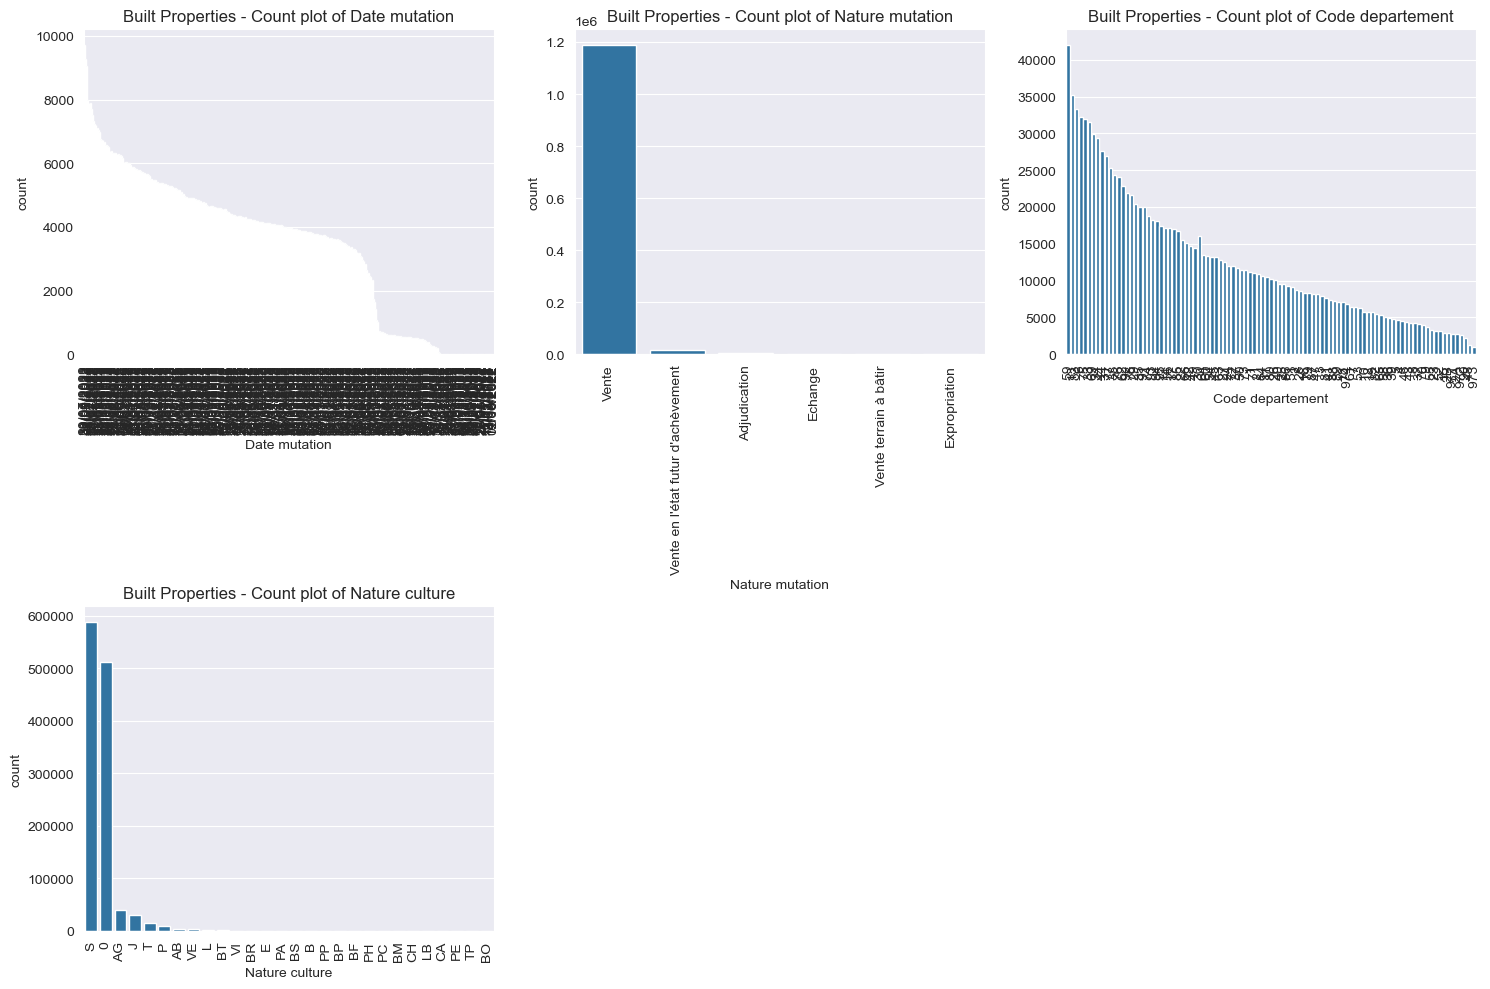

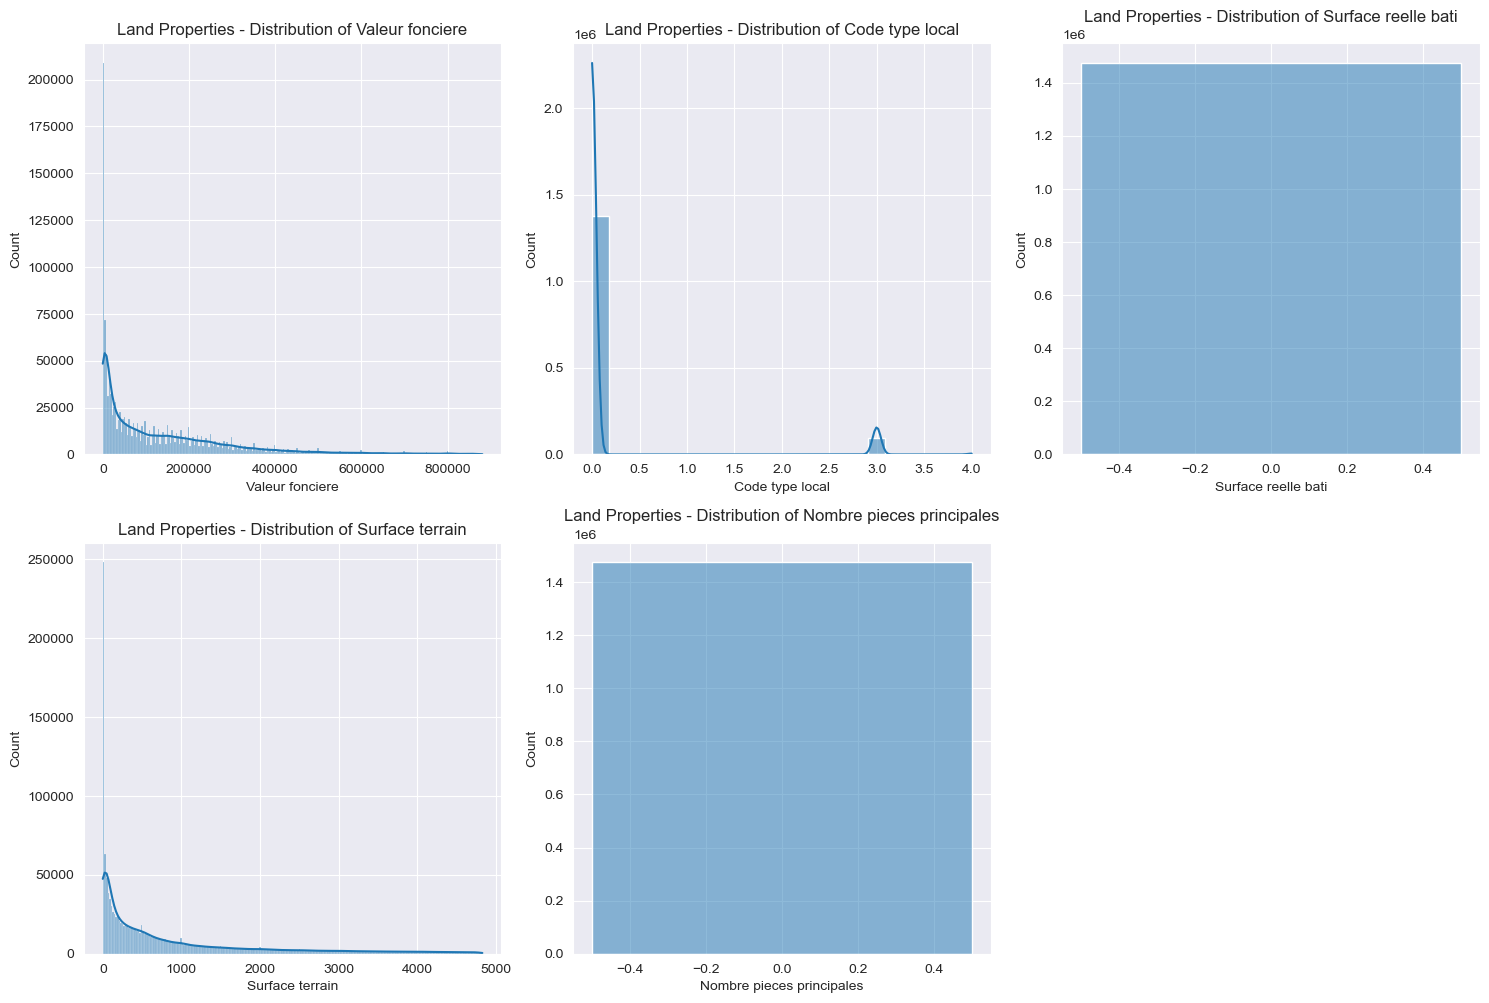

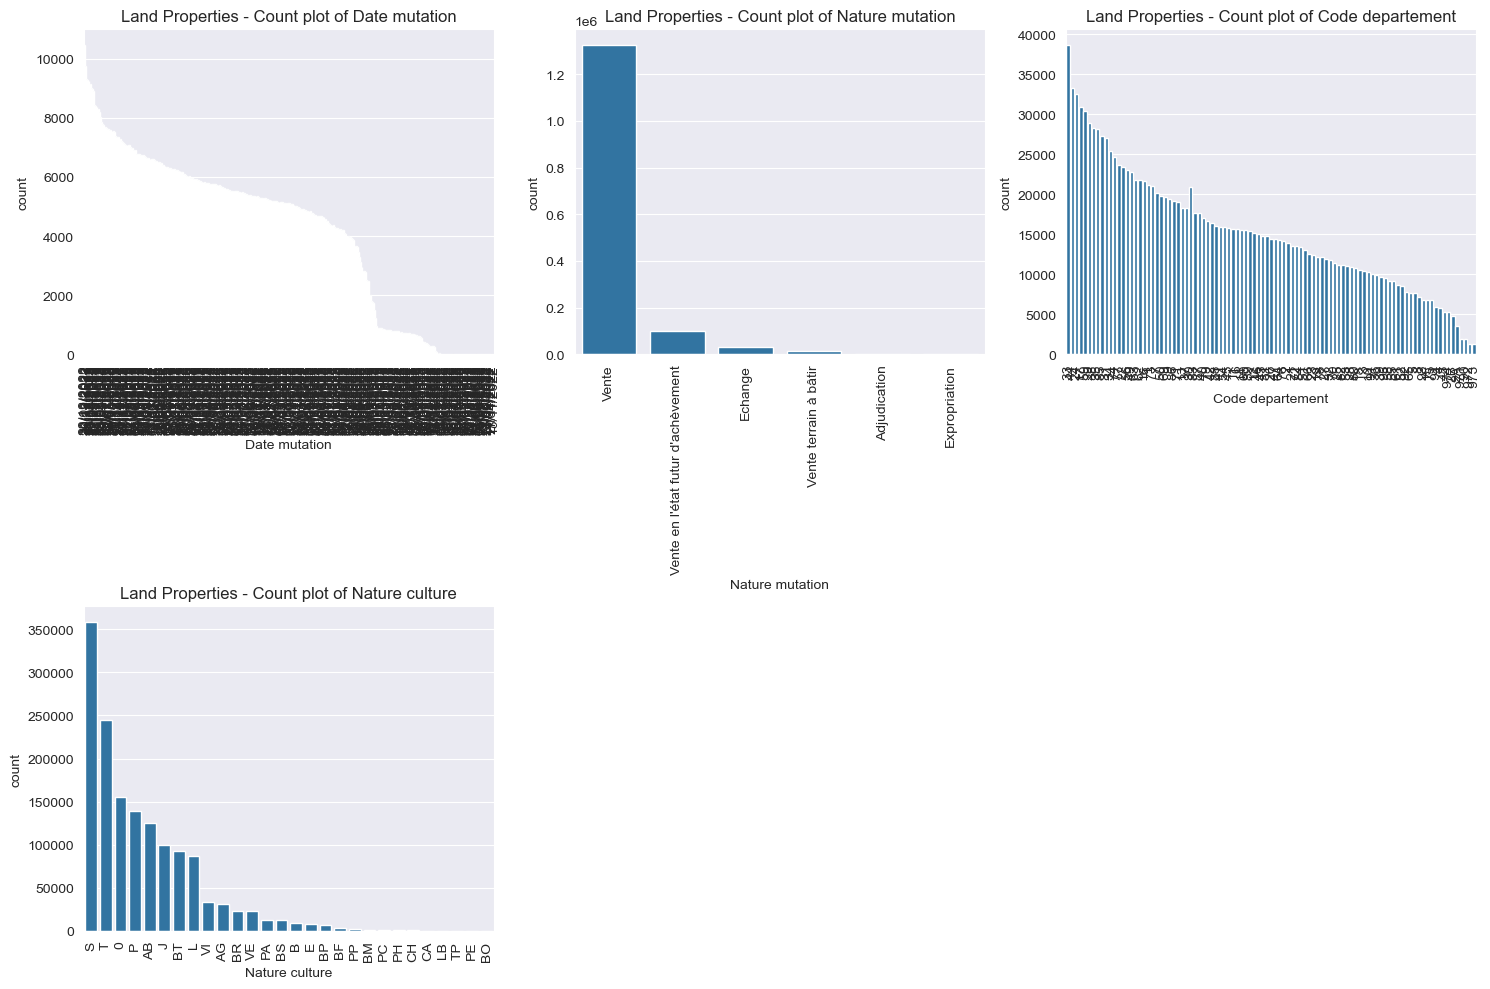

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize both numerical and categorical columns
def visualize_distribution(df, title_prefix):
    # Define the columns to plot
    columns_to_plot = ["Date mutation", "Nature mutation", "Valeur fonciere", 
                       "Code departement", "Code type local", 
                       "Surface reelle bati", "Surface terrain", 
                       "Nombre pieces principales", "Nature culture"]

    # Subset the dataframe
    df_subset = df[columns_to_plot]

    # Separate numerical and categorical columns
    numerical_cols = df_subset.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df_subset.select_dtypes(include=['object']).columns

    # Plot the distribution for numerical columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols):
        plt.subplot(2, 3, i + 1)
        sns.histplot(df_subset[col].dropna(), kde=True)
        plt.title(f'{title_prefix} - Distribution of {col}')
        plt.tight_layout()

    plt.show()

    # Plot the count plot for categorical columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_cols):
        plt.subplot(2, 3, i + 1)
        sns.countplot(data=df_subset, x=col, order=df_subset[col].value_counts().index)
        plt.xticks(rotation=90)  # Rotate x-labels if necessary
        plt.title(f'{title_prefix} - Count plot of {col}')
        plt.tight_layout()

    plt.show()

# Visualize df_built (properties with built areas)
visualize_distribution(df_built, "Built Properties")

# Visualize df_land (land-only properties)
visualize_distribution(df_land, "Land Properties")


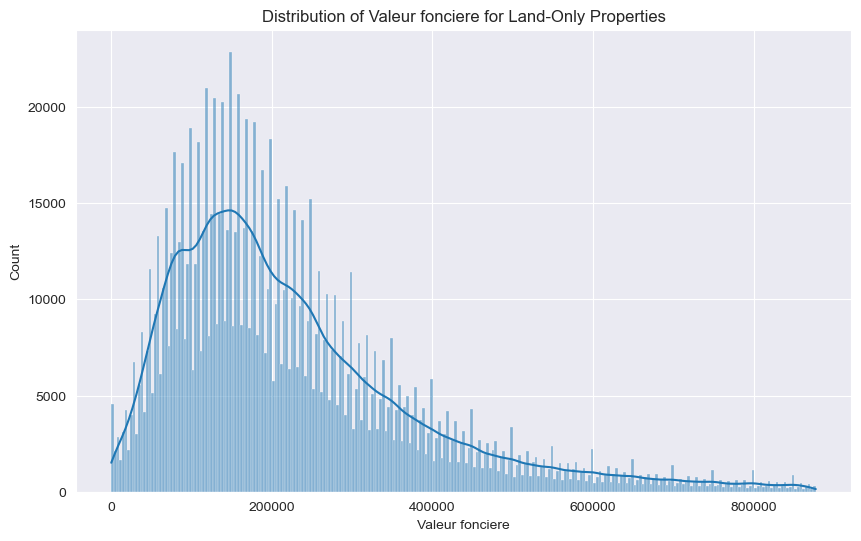

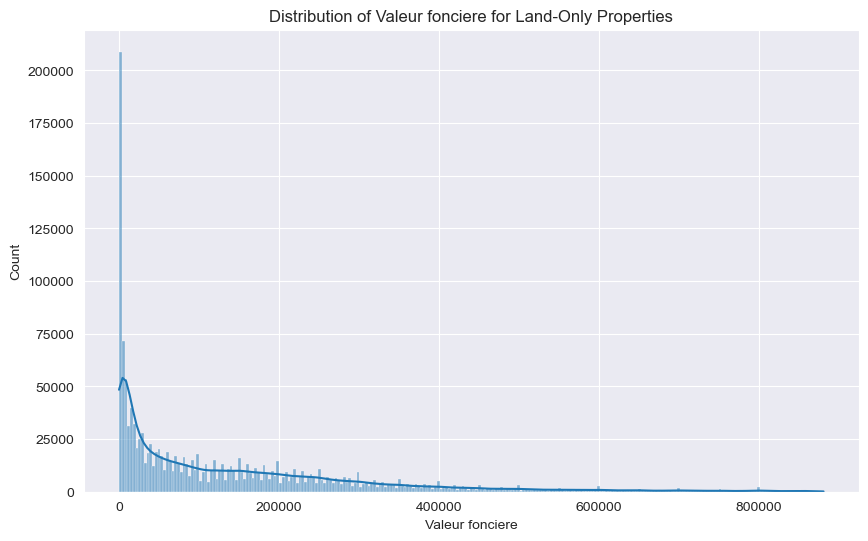

In [22]:
# Visualize land-only properties' value (df_land)
plt.figure(figsize=(10, 6))
sns.histplot(df_built["Valeur fonciere"], kde=True)
plt.title('Distribution of Valeur fonciere for Land-Only Properties')
plt.show()

# Visualize land-only properties' value (df_land)
plt.figure(figsize=(10, 6))
sns.histplot(df_land["Valeur fonciere"], kde=True)
plt.title('Distribution of Valeur fonciere for Land-Only Properties')
plt.show()
